In [16]:
%reset
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.hamiltonian_multishape as hamiltonian

torch.set_default_tensor_type(torch.DoubleTensor)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
nb_pts1 = 10
nb_pts2 = 7
dim = 2

o1 = torch.tensor([0.,0.])
o2 = torch.tensor([10.,0.])
origin = [o1,o2]
r1 = 2
r2 = 1
radius = [r1, r2]
nb_pts = [nb_pts1, nb_pts2]
source = mm.multipleCircles(origin, radius, nb_pts)

origin_target = [[0,5], [10,-5]]
target = mm.multipleCircles(origin_target, radius, nb_pts)

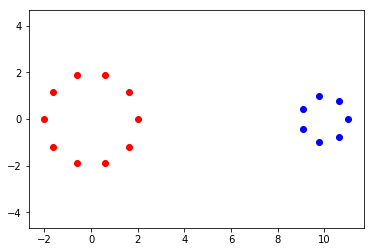

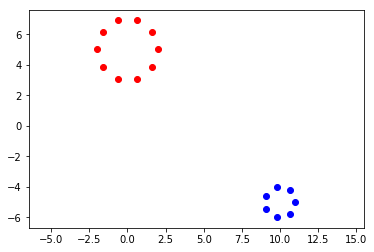

In [18]:
plt.scatter(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), c='red')
plt.scatter(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), c='blue')
plt.axis('equal')

plt.figure()
plt.scatter(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), c='red')
plt.scatter(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), c='blue')

plt.axis('equal')
plt.show()

In [19]:
# Defining the deformation modules
sigma1 = 3
manifold1 = dm.manifold.Landmarks(dim, nb_pts1, gd=source[0].view(-1))
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)

sigma2 = 3
manifold2 = dm.manifold.Landmarks(dim, nb_pts2, gd=source[1].view(-1))
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)

module_list = [trans1, trans2]
sigma_bg = 0.1
modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

In [20]:
# defining cotangent variable
# needed to prevent that everything is symmetric (gradient would be zero and nothing moves)
#modules.manifold.fill_cotan( [*[torch.rand(gd.shape) for gd in modules.manifold.gd[:-1]], [torch.rand(gd.shape) for gd in modules.manifold.gd[-1]]])
#modules.manifold.fill_cotan_zero()

In [21]:
constr_Id = dm.constraints.Identity()
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)

In [31]:
my_model = dm.models.ModelMultishapePointsRegistration(source, [trans1, trans2], sigma_bg,  dm.attachement.L2NormAttachement_multi(), constr_Id)
costs = my_model.fit(target, lr=1e-4, l=50., max_iter=200, log_interval=5)

tensor([[ 2.1403e-02, -1.0844e-03],
        [ 1.2424e-02,  5.5836e-03],
        [ 3.4630e-03,  6.8157e-03],
        [-3.4629e-03,  6.8157e-03],
        [-1.2424e-02,  5.5835e-03],
        [-2.1403e-02, -1.0846e-03],
        [-2.2916e-02, -1.9622e-02],
        [-1.1107e-02, -3.8773e-02],
        [ 1.1108e-02, -3.8773e-02],
        [ 2.2916e-02, -1.9622e-02],
        [ 0.0000e+00,  2.3510e-38],
        [ 2.3510e-38,  2.3510e-38],
        [ 0.0000e+00,  2.3510e-38],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -1.1755e-38],
        [ 0.0000e+00,  2.3510e-38],
        [ 1.1755e-38,  4.7020e-38]], grad_fn=<CatBackward>)
It: 0, deformation cost: 4.893806, attach: 557.551205. Total cost: 562.445011
tensor([[ 2.1403e-02, -1.0843e-03],
        [ 1.2424e-02,  5.5837e-03],
        [ 3.4630e-03,  6.8158e-03],
        [-3.4629e-03,  6.8158e-03],
        [-1.2424e-02,  5.5835e-03],
        [-2.1402e-02, -1.0845e-03],
        [-2.2916e-02, -1.9622e-02],
        [-1.1107e-02, -3.8773e-02]

tensor([[ 2.1364e-02, -9.2453e-04],
        [ 1.2404e-02,  5.6984e-03],
        [ 3.4556e-03,  6.9453e-03],
        [-3.4557e-03,  6.9457e-03],
        [-1.2405e-02,  5.6994e-03],
        [-2.1366e-02, -9.2298e-04],
        [-2.2876e-02, -1.9433e-02],
        [-1.1090e-02, -3.8490e-02],
        [ 1.1089e-02, -3.8491e-02],
        [ 2.2874e-02, -1.9435e-02],
        [-2.3510e-38,  0.0000e+00],
        [ 0.0000e+00,  2.3510e-38],
        [-1.1755e-38,  0.0000e+00],
        [-1.1755e-38, -2.3510e-38],
        [-2.3510e-38, -2.3510e-38],
        [-3.5265e-38,  2.3510e-38],
        [-2.3510e-38,  0.0000e+00]], grad_fn=<CatBackward>)
tensor([[ 2.1357e-02, -9.1015e-04],
        [ 1.2401e-02,  5.7067e-03],
        [ 3.4545e-03,  6.9547e-03],
        [-3.4545e-03,  6.9548e-03],
        [-1.2401e-02,  5.7072e-03],
        [-2.1358e-02, -9.0937e-04],
        [-2.2868e-02, -1.9413e-02],
        [-1.1086e-02, -3.8458e-02],
        [ 1.1086e-02, -3.8458e-02],
        [ 2.2867e-02, -1.9414e-02],
    

tensor([[ 2.1285e-02, -7.4593e-04],
        [ 1.2360e-02,  5.7643e-03],
        [ 3.4410e-03,  7.0223e-03],
        [-3.4411e-03,  7.0225e-03],
        [-1.2360e-02,  5.7649e-03],
        [-2.1286e-02, -7.4486e-04],
        [-2.2787e-02, -1.9117e-02],
        [-1.1048e-02, -3.7985e-02],
        [ 1.1048e-02, -3.7986e-02],
        [ 2.2786e-02, -1.9119e-02],
        [ 2.3510e-38,  1.1755e-38],
        [ 3.5265e-38,  2.3510e-38],
        [-1.1755e-38,  4.7020e-38],
        [ 1.1755e-38,  2.3510e-38],
        [ 0.0000e+00,  1.1755e-38],
        [-1.1755e-38,  0.0000e+00],
        [ 0.0000e+00,  3.5265e-38]], grad_fn=<CatBackward>)
tensor([[ 2.1278e-02, -7.3073e-04],
        [ 1.2355e-02,  5.7674e-03],
        [ 3.4394e-03,  7.0262e-03],
        [-3.4395e-03,  7.0264e-03],
        [-1.2355e-02,  5.7680e-03],
        [-2.1279e-02, -7.2965e-04],
        [-2.2780e-02, -1.9087e-02],
        [-1.1044e-02, -3.7937e-02],
        [ 1.1044e-02, -3.7937e-02],
        [ 2.2778e-02, -1.9088e-02],
    

KeyboardInterrupt: 

tensor([[-1.2223e-03,  2.3461e-02],
        [-1.7778e-03,  4.6538e-02],
        [-2.5635e-03,  5.5190e-02],
        [-3.7588e-03,  5.3571e-02],
        [-5.4743e-03,  4.2672e-02],
        [-7.0910e-03,  2.8568e-02],
        [-4.5724e-03,  7.8924e-03],
        [-7.2533e-04, -1.9581e-02],
        [ 1.0294e-03, -7.4475e-03],
        [ 4.6140e-04,  3.8273e-03],
        [-7.3468e-39, -1.0286e-38],
        [-3.9673e-38, -4.1142e-38],
        [-7.7142e-39, -1.9285e-39],
        [-4.4081e-39, -2.8469e-38],
        [ 2.0020e-38, -2.3602e-38],
        [-2.9020e-38, -7.0713e-39],
        [-8.2652e-39, -4.5918e-38]], grad_fn=<CatBackward>)


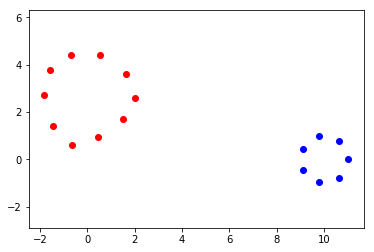

In [8]:
my_model.compute(target)
shot_manifold = my_model()

plt.scatter(shot_manifold[0].view(-1,2)[:, 0].detach().numpy(),shot_manifold[0].view(-1,2)[:, 1].detach().numpy(), c='red')
plt.scatter(shot_manifold[1].view(-1,2)[:, 0].detach().numpy(),shot_manifold[1].view(-1,2)[:, 1].detach().numpy(), c='blue')
plt.axis('equal')
plt.show()

In [9]:
shot_manifold

[tensor([[ 2.0006,  2.5865],
         [ 1.6405,  3.6218],
         [ 0.5614,  4.3900],
         [-0.6827,  4.4222],
         [-1.5536,  3.7886],
         [-1.8073,  2.7039],
         [-1.4629,  1.3930],
         [-0.6461,  0.6167],
         [ 0.4569,  0.9321],
         [ 1.5002,  1.7080]], grad_fn=<ViewBackward>),
 tensor([[ 1.1000e+01, -3.1653e-32],
         [ 1.0623e+01,  7.8183e-01],
         [ 9.7775e+00,  9.7493e-01],
         [ 9.0990e+00,  4.3388e-01],
         [ 9.0990e+00, -4.3388e-01],
         [ 9.7775e+00, -9.7493e-01],
         [ 1.0623e+01, -7.8183e-01]], grad_fn=<ViewBackward>),
 [tensor([[ 2.0006e+00,  5.6951e-04],
          [ 1.6186e+00,  1.1761e+00],
          [ 6.1860e-01,  1.9027e+00],
          [-6.1746e-01,  1.9027e+00],
          [-1.6175e+00,  1.1761e+00],
          [-1.9994e+00,  5.6951e-04],
          [-1.6175e+00, -1.1750e+00],
          [-6.1746e-01, -1.9015e+00],
          [ 6.1860e-01, -1.9015e+00],
          [ 1.6186e+00, -1.1750e+00]], grad_fn=<ViewBackw